For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

##### Experimental

In [2]:
# simulation using .rvs on distribution object

# represent data
# create matrix
n_simulations = 100_000

cars_at_noon_ex_one = stats.poisson(2).rvs(n_simulations)
cars_at_noon_ex_one

array([3, 2, 2, ..., 1, 2, 1])

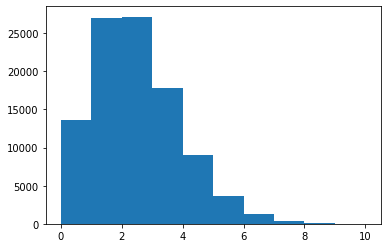

In [3]:
plt.hist(cars_at_noon_ex_one)
plt.show()

In [4]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_one == 0).mean()

0.13615

In [5]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_one >= 3).mean()

0.32194

In [6]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_one > 0).mean()

0.86385

In [7]:
# simulation using using numpy

# represent data
# create matrix

cars_at_noon_ex_two = np.random.poisson(2, size=(n_simulations))
cars_at_noon_ex_two

array([4, 2, 1, ..., 2, 0, 0])

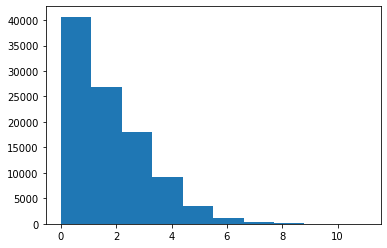

In [8]:
plt.hist(cars_at_noon_ex_two)
plt.show()

In [9]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_two == 0).mean()

0.13499

In [10]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_two >= 3).mean()

0.3241

In [11]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_two > 0).mean()

0.86501

###### Theoretical

In [12]:
cars_at_noon_th = stats.poisson(2)
cars_at_noon_th

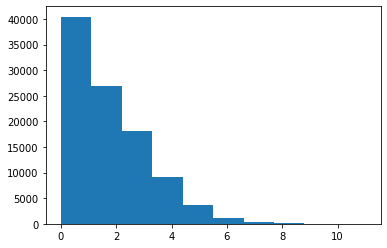

In [13]:
plt.hist(cars_at_noon_th.rvs(100_000))
plt.show()

In [14]:
# What is the probability that no cars drive up in the noon hour?
cars_at_noon_th.pmf(0)

0.1353352832366127

In [15]:
# What is the probability that 3 or more cars come through the
# drive through?
cars_at_noon_th.sf(2)

0.32332358381693654

In [16]:
# How likely is it that the drive through gets at least 1 car?
cars_at_noon_th.sf(0)

0.8646647167633873

---
2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

###### Experimental

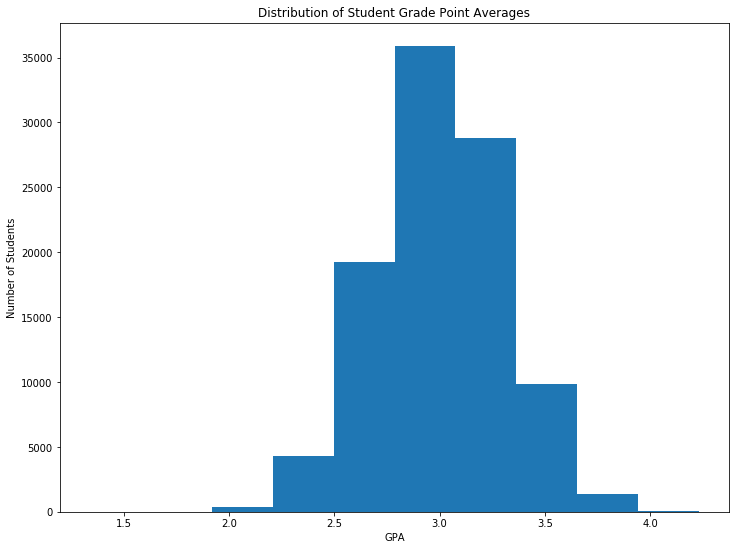

In [17]:
# simulation using using numpy
n_simulations = 100_000
n_trials = 1

# represent data
# create matrix
grades_ex = np.random.normal(3, .3, size=(n_simulations, n_trials))
plt.figure(figsize=(12,9))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.hist(grades_ex)
plt.show()

In [18]:
grades_ex

array([[3.04195863],
       [3.59224597],
       [3.14384321],
       ...,
       [2.99523515],
       [3.01106687],
       [2.69479947]])

In [19]:
# What grade point average is required to be in the top 5% of the
# graduating class?
np.percentile(grades_ex, 95)

3.492097060000759

In [20]:
# What GPA constitutes the bottom 15% of the class?
np.percentile(grades_ex, 15)

2.6869260887904285

In [21]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?

gpa = 2.8
theory = gpa > np.percentile(grades_ex, 20) and gpa < np.percentile(grades_ex, 30)
print(np.percentile(grades_ex, 20))
print(np.percentile(grades_ex, 30))

theory

2.745638089936532
2.8417297730941424


True

In [22]:
# If I have a GPA of 3.5, what percentile am I in?
(grades_ex <= 3.5).mean()

0.9527

###### Theoretical

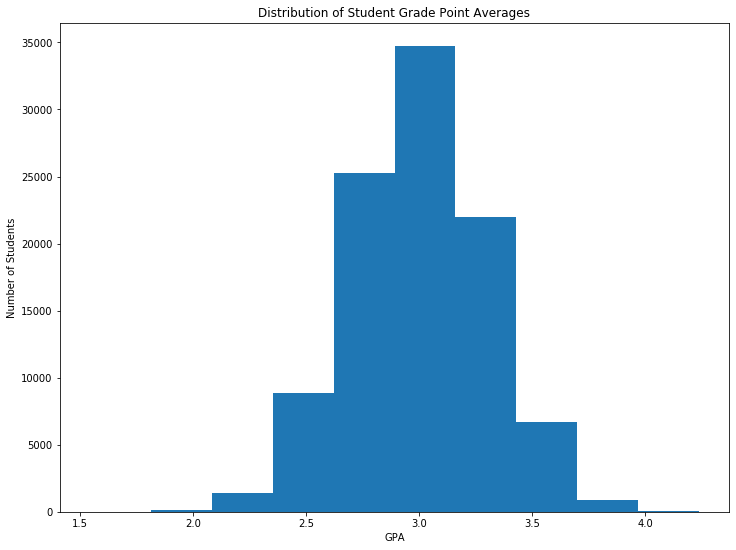

In [23]:
mean = 3
std = .3

grades_th = stats.norm(mean, std)
plt.figure(figsize=(12,9))
plt.hist(grades_th.rvs(n_simulations))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.show()

In [24]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.isf(.05) # top 5%

3.4934560880854417

In [25]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.ppf(.95) # 95th percentile

3.4934560880854417

In [26]:
# What GPA constitutes the bottom 15% of the class?
grades_th.ppf(.15) # 15th percentile

2.689069983151863

In [27]:
# What GPA constitutes the bottom 15% of the class?
grades_th.isf(.85) # bottom 15%

2.689069983151863

---
###### Question

In [28]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?
second_decile = 2 / 10
third_decile = 2 / 10
print(second_decile)
print(third_decile)

0.2
0.2


In [29]:
print(grades_th.ppf(second_decile))
print(grades_th.ppf(third_decile))

2.7475136299281258
2.7475136299281258


---

In [30]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.sf(3.5) # 95th percentile

0.0477903522728147

In [31]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.cdf(3.5) # top 5%

0.9522096477271853

---
3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

###### Experimental

In [32]:
n = 4326 # number of trials
p = .02 # probability of success
n_simulations = 100_000

(np.random.binomial(n, p, size=(n_simulations)) >= 97).mean()

0.13865

###### Theoretical

In [33]:
n = 4326 # number of trials
p = .02 # probability
stats.binom(n, p).sf(96)

0.1397582363130086

---
4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    - What is the probability that at least one of your first 60 answers is correct?

###### Experimental

In [34]:
key = pd.DataFrame(np.random.random(size=(100_000, 100)).round(2))
key

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.84,0.95,0.54,0.45,0.74,0.71,0.39,0.41,0.22,0.27,...,0.02,0.79,0.25,0.65,0.44,0.99,0.42,0.23,0.32,0.91
1,0.76,0.89,0.92,0.95,0.65,0.93,0.20,0.18,0.51,0.05,...,0.09,0.59,0.98,0.64,0.09,0.18,0.29,0.83,0.18,0.46
2,0.47,0.29,0.14,0.09,0.39,0.82,1.00,0.99,0.94,0.83,...,0.29,0.11,0.28,0.88,0.45,0.24,0.96,0.94,0.63,0.25
3,0.46,0.50,0.38,0.50,0.86,0.01,0.13,0.34,0.73,0.02,...,0.36,0.94,0.08,0.48,0.24,0.26,0.26,0.23,0.99,0.60
4,0.21,0.43,0.85,0.23,0.49,0.73,0.63,0.14,0.26,0.52,...,0.23,0.31,0.06,0.58,0.56,0.85,0.02,0.29,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.43,0.68,0.78,0.93,0.66,0.11,0.24,1.00,0.33,0.63,...,0.62,0.57,0.02,0.03,0.77,0.07,0.91,0.83,0.13,0.51
99996,0.85,0.40,0.58,0.64,0.76,0.81,0.15,0.65,0.68,0.50,...,0.06,0.78,0.60,0.59,0.92,0.82,0.80,0.88,0.96,0.64
99997,0.34,0.36,0.70,0.51,0.55,0.14,0.24,0.82,0.90,0.70,...,0.23,0.39,0.64,0.68,0.24,0.86,0.36,0.30,0.15,0.63
99998,0.83,0.32,0.16,0.51,0.55,0.88,0.56,0.26,0.60,0.29,...,0.34,0.05,0.15,0.64,0.70,0.58,0.81,0.11,0.95,0.45


In [35]:
my_answers = pd.DataFrame(np.random.random(size=(100_000, 100)).round(2))
my_answers

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.47,0.99,0.89,0.24,0.06,0.20,0.14,0.07,0.40,0.63,...,0.64,0.85,0.72,0.11,0.43,0.94,0.57,0.34,0.60,0.31
1,0.51,0.29,0.13,0.71,0.96,0.22,0.89,0.01,0.58,0.69,...,0.55,0.75,0.69,0.11,0.60,0.07,0.29,0.17,0.12,0.81
2,0.94,0.77,0.95,0.32,0.38,0.89,0.01,0.53,0.84,0.53,...,0.00,0.39,0.15,0.46,0.52,0.43,0.02,0.36,0.35,0.59
3,0.26,0.92,0.94,0.08,0.39,0.76,0.64,0.78,0.33,0.72,...,0.73,0.18,0.46,0.01,0.41,0.97,0.34,0.10,0.91,0.65
4,0.86,0.92,0.46,0.15,0.63,0.28,0.82,0.78,0.11,0.21,...,0.20,0.69,0.35,0.77,0.32,0.46,0.62,0.34,0.04,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.66,0.46,0.01,0.66,0.86,0.67,0.38,0.24,0.57,0.23,...,0.86,0.83,0.07,0.28,0.89,0.01,0.39,0.93,0.40,0.87
99996,0.19,0.47,0.67,0.87,0.75,0.92,0.31,0.14,0.63,0.86,...,0.63,0.88,0.97,0.54,0.46,0.44,0.19,0.06,0.68,0.17
99997,0.77,0.31,0.73,0.07,0.09,0.53,0.33,0.32,0.51,0.25,...,0.73,0.27,0.75,0.36,0.69,0.51,0.86,0.43,0.81,0.01
99998,0.24,0.65,0.49,0.26,0.30,0.75,0.94,0.97,0.49,0.51,...,0.66,0.46,0.73,0.64,0.74,0.26,0.08,0.38,0.68,0.96


In [36]:
# get first 60 columns
my_answers.loc[:,:59]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.47,0.99,0.89,0.24,0.06,0.20,0.14,0.07,0.40,0.63,...,0.21,0.89,0.81,0.24,0.70,0.59,0.08,0.58,0.77,0.74
1,0.51,0.29,0.13,0.71,0.96,0.22,0.89,0.01,0.58,0.69,...,0.24,0.14,0.01,0.41,0.93,0.99,0.56,0.39,0.60,0.61
2,0.94,0.77,0.95,0.32,0.38,0.89,0.01,0.53,0.84,0.53,...,0.32,0.11,0.16,0.12,0.58,0.18,0.13,0.31,0.85,0.63
3,0.26,0.92,0.94,0.08,0.39,0.76,0.64,0.78,0.33,0.72,...,0.40,0.02,0.24,0.10,0.73,0.70,0.81,0.93,0.43,0.82
4,0.86,0.92,0.46,0.15,0.63,0.28,0.82,0.78,0.11,0.21,...,0.31,0.43,0.98,0.36,0.81,0.60,0.57,0.79,0.39,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.66,0.46,0.01,0.66,0.86,0.67,0.38,0.24,0.57,0.23,...,0.37,0.68,0.69,0.85,0.09,0.42,0.33,0.97,0.28,0.08
99996,0.19,0.47,0.67,0.87,0.75,0.92,0.31,0.14,0.63,0.86,...,0.67,0.91,0.79,0.78,0.80,0.91,0.12,0.62,0.30,0.02
99997,0.77,0.31,0.73,0.07,0.09,0.53,0.33,0.32,0.51,0.25,...,0.17,0.25,0.59,0.92,0.83,0.14,0.52,0.11,0.97,0.27
99998,0.24,0.65,0.49,0.26,0.30,0.75,0.94,0.97,0.49,0.51,...,0.64,0.99,0.90,0.55,0.16,0.28,0.10,0.13,0.96,0.07


In [37]:
# aggregate by row
my_answers["correct_answers_first_sixty"] = (my_answers.loc[:,:59] == key.loc[:,:59]).sum(axis=1)
my_answers

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,correct_answers_first_sixty
0,0.47,0.99,0.89,0.24,0.06,0.20,0.14,0.07,0.40,0.63,...,0.85,0.72,0.11,0.43,0.94,0.57,0.34,0.60,0.31,0
1,0.51,0.29,0.13,0.71,0.96,0.22,0.89,0.01,0.58,0.69,...,0.75,0.69,0.11,0.60,0.07,0.29,0.17,0.12,0.81,2
2,0.94,0.77,0.95,0.32,0.38,0.89,0.01,0.53,0.84,0.53,...,0.39,0.15,0.46,0.52,0.43,0.02,0.36,0.35,0.59,0
3,0.26,0.92,0.94,0.08,0.39,0.76,0.64,0.78,0.33,0.72,...,0.18,0.46,0.01,0.41,0.97,0.34,0.10,0.91,0.65,0
4,0.86,0.92,0.46,0.15,0.63,0.28,0.82,0.78,0.11,0.21,...,0.69,0.35,0.77,0.32,0.46,0.62,0.34,0.04,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.66,0.46,0.01,0.66,0.86,0.67,0.38,0.24,0.57,0.23,...,0.83,0.07,0.28,0.89,0.01,0.39,0.93,0.40,0.87,1
99996,0.19,0.47,0.67,0.87,0.75,0.92,0.31,0.14,0.63,0.86,...,0.88,0.97,0.54,0.46,0.44,0.19,0.06,0.68,0.17,0
99997,0.77,0.31,0.73,0.07,0.09,0.53,0.33,0.32,0.51,0.25,...,0.27,0.75,0.36,0.69,0.51,0.86,0.43,0.81,0.01,1
99998,0.24,0.65,0.49,0.26,0.30,0.75,0.94,0.97,0.49,0.51,...,0.46,0.73,0.64,0.74,0.26,0.08,0.38,0.68,0.96,0


In [38]:
# What is the probability that at least one of your first 60
# answers is correct?
(my_answers["correct_answers_first_sixty"] > 0).mean()

0.45275

###### Theoretical

In [39]:
n = 60 # number of trials
p = .01 # probability

stats.binom(n, p).sf(0)

0.4528433576092388

---
5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

###### Experimental

In [40]:
# How likely is it that the break area gets cleaned up each day?
n_simulations = 100_000
n_trials = round(.9 * (3 * 22))

# represent data; 0 == dirty, 1 == clean
# create matrix
break_room_cleanliness_ex = np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.97, .03])
break_room_cleanliness_ex

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
# aggregate by row
daily_cleanliness = break_room_cleanliness_ex.sum(axis=1)
daily_cleanliness

array([1, 2, 3, ..., 1, 3, 1])

In [42]:
# aggregate for probability - each day
(daily_cleanliness > 0).mean()

0.83353

In [43]:
n = round(.9 * (3 * 22))
simulation = stats.binom(n, .03).rvs(100_000)
simulation

array([5, 3, 2, ..., 0, 4, 2])

In [44]:
n_days = 2

---
###### Question - calculate consecutive days?

In [45]:
n_simulations = 100_000
n_trials = 2

# represent data; 0 == dirty, 1 == clean
# create matrix
break_room_cleanliness_ex_2 = np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.97, .03])
break_room_cleanliness_ex_2

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [46]:
# How likely is it that it goes two days without getting cleaned up?
total_clean = break_room_cleanliness_ex_2.sum(axis=1)
total_clean

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
(total_clean == 0).mean()

0.93971

---

In [48]:
# All week?
(daily_cleanliness == 0).mean()

0.16647

###### Theoretical

In [49]:
# How likely is it that the break area gets cleaned up each day?
n = round(.9 * (3 * 22)) # number of trials
p = .03 # probability of success

break_room_cleanliness_th = stats.binom(n, p)
break_room_cleanliness_th.sf(0)

0.8342199288437355

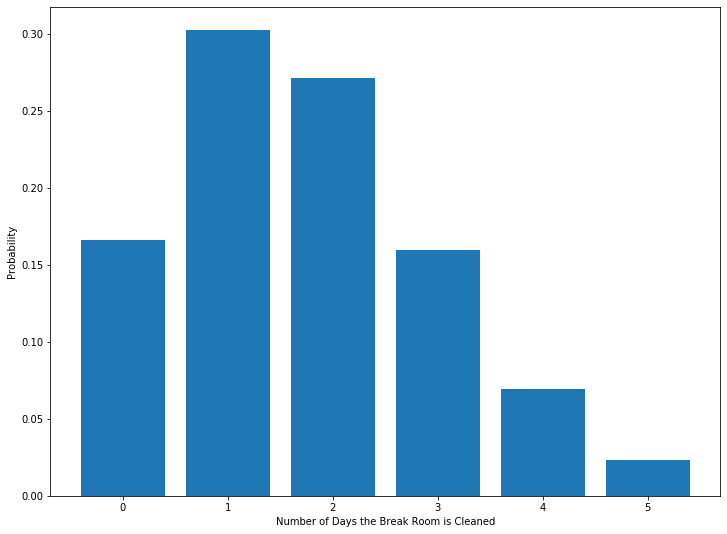

In [50]:
plt.figure(figsize=(12,9))
x = np.arange(0,6)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y)
plt.xlabel("Number of Days the Break Room is Cleaned")
plt.ylabel("Probability")
plt.show()

In [51]:
# How likely is it that it goes two days without getting cleaned
# up?
break_room_cleanliness_th.pmf(3)

0.15943530376915885

In [52]:
# All week?
break_room_cleanliness_th.pmf(0)

0.16578007115626484

---
6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

###### Experimental

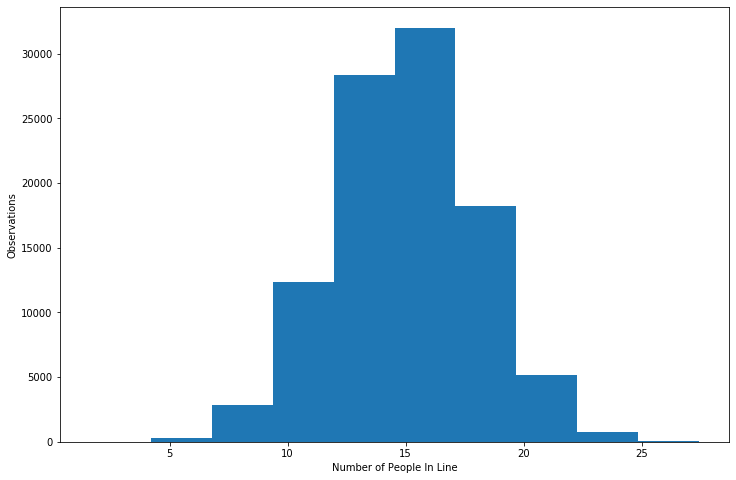

In [53]:
# average number of people in line
mean = 15
std = 3
n_simulations = 100_000

number_of_people_in_line = np.random.normal(mean, std, size=(n_simulations))
plt.figure(figsize=(12, 8))
plt.hist(number_of_people_in_line)
plt.xlabel("Number of People In Line")
plt.ylabel("Observations")
plt.show()

In [54]:
total_time_to_food_delivery = (number_of_people_in_line * 2) + 10
total_time_to_food_delivery

array([36.39333848, 44.13288682, 46.15106313, ..., 31.95598792,
       50.39555019, 41.98647339])

In [55]:
(total_time_to_food_delivery <= 45).mean()

0.798

###### Theoretical

In [56]:
# average number of people in line
mean = 15
std = 3
n_simulations = 100_000

number_of_customers_on_line = stats.norm(mean, std)
number_of_customers_on_line

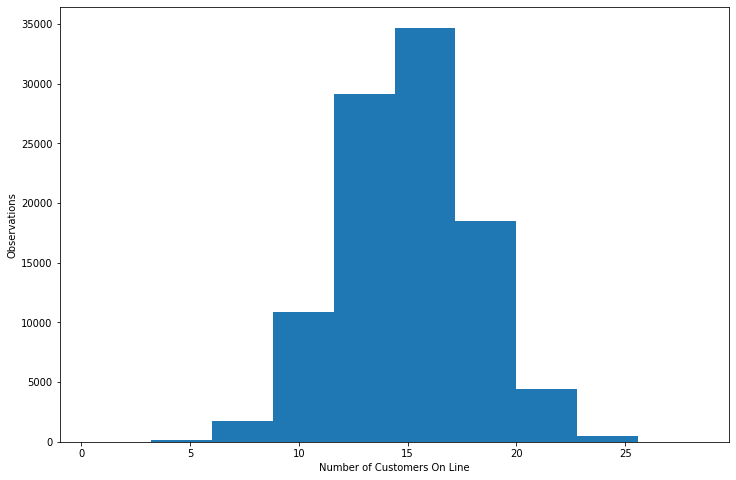

In [57]:
plt.figure(figsize=(12, 8))
plt.hist(number_of_customers_on_line.rvs(n_simulations))
plt.xlabel("Number of Customers On Line")
plt.ylabel("Observations")
plt.show()

In [58]:
total = number_of_customers_on_line.rvs(n_simulations) * 2 + 10
total

array([31.66028014, 41.14065409, 46.71573466, ..., 37.99088664,
       37.43697118, 37.49861532])

In [59]:
# what is the likelihood that you have at least 15 minutes left to
# eat your food before you have to go back to class?
number_of_customers_on_line.cdf(17)

0.7475074624530771

---
7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

    a. What percent of employees earn less than 60,000?
    
    b. What percent of employees earn more than 95,000?
    
    c. What percent of employees earn between 65,000 and 80,000?
    
    d. What do the top 5% of employees make?

In [60]:
from env import host, user, password

In [61]:
def get_db_url(username, hostname, password, database):
    return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

employees_url = get_db_url(user, host, password, "employees")


In [62]:
salaries = pd.read_sql("""SELECT *
FROM salaries as s
WHERE s.to_date > CURDATE();""", employees_url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


###### Experimental

In [63]:
# average salary of current employees,
# along with the standard deviation
mean = np.mean(salaries["salary"])
std = np.std(salaries["salary"])
size = len(salaries["emp_no"])

salaries_exp = np.random.normal(mean, std, size=(size))
salaries_exp

array([75684.131647  , 84946.61157632, 66225.38515547, ...,
       69112.54370725, 74987.66848127, 67888.51298641])

In [64]:
# What percent of employees earn less than 60,000?
(salaries_exp < 60000).mean()

0.2436449501091103

In [65]:
# actual percentage of employees who earn less than 60000
(salaries.salary < 60000).mean()

0.2705727041028802

In [66]:
# What percent of employees earn more than 95,000?
# simulated
(salaries_exp > 95000).mean()

0.09161516549782613

In [67]:
# actual
(salaries.salary > 95000).mean()

0.1086272092752078

In [68]:
# What percent of employees earn between 65,000 and 80,000?
# actual
(salaries.salary.between(65000, 80000)).mean()

0.32515700221552196

In [69]:
# What do the top 5% of employees make? - random.normal
np.percentile(salaries_exp, 95)

100503.33109693986

In [70]:
# What do the top 5% of employees make? - DataFrame
np.percentile(salaries["salary"], 95)

104225.84999999998

###### Theoretical

In [71]:
# average salary of current employees,
# along with the standard deviation
mean = np.mean(salaries["salary"])
std = np.std(salaries["salary"])
size = len(salaries["emp_no"])
print(mean)
print(std)
print(size)

72012.23585730705
17309.959336346747
240124


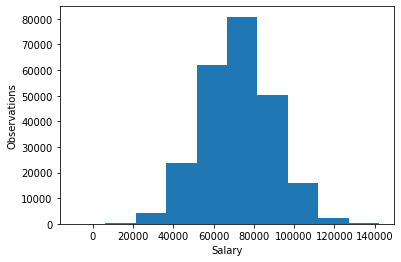

In [72]:
salaries_distribution = stats.norm(mean, std)
plt.hist(salaries_distribution.rvs(size))
plt.xlabel("Salary")
plt.ylabel("Observations")
plt.show()

In [73]:
# What percent of employees earn less than 60,000?
salaries_distribution.cdf(60000)

0.24385697169355336

In [74]:
# What percent of employees earn more than 95,000?
salaries_distribution.sf(95000)

0.09208773524185987

In [75]:
# What percent of employees earn between 65,000 and 80,000?
below_sixty_five = salaries_distribution.cdf(65000)
above_eighty = salaries_distribution.sf(80000)

print(below_sixty_five)
print(above_eighty)
earn_between_sixty_five_and_eighty = 1 - (below_sixty_five + above_eighty)
print(f"{earn_between_sixty_five_and_eighty} of employees earn between 65,000 and 80,000")

0.34270261194428064
0.32223616488920215
0.3350612231665172 of employees earn between 65,000 and 80,000


In [76]:
# What do the top 5% of employees make?
salaries_distribution.isf(.05)

100484.58525407952

In [77]:
# What do the top 5% of employees make?
salaries_distribution.ppf(.95)

100484.5852540795